## Baseline danger metric
Development of baseline danger metric for a bike ride

In [1]:
import pandas as pd
import osmnx as ox
import numpy as np
import matplotlib.pyplot as plt

In [2]:
CRASHES_FILEPATH = "../../data/Motor_Vehicle_Collisions_-_Crashes.csv"

# Use helper funcs from .py files

In [3]:
import os
print(os.getcwd())

import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
print(sys.path)

/Users/conorlyman/school/aml/spoke/notebooks/conorlyman
['/Users/conorlyman/school/aml/spoke/notebooks/conorlyman', '/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python38.zip', '/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8', '/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/lib-dynload', '', '/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages', '/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages/IPython/extensions', '/Users/conorlyman/.ipython', '/Users/conorlyman/school/aml/spoke']


In [4]:
from spoke.bike_route import BikeRoute

In [5]:
G = ox.graph_from_address("420 East 73rd Street, New York, New York 10021", network_type="bike", dist=1500)

/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/conorlyman/opt/anaconda3/envs/spokenv/lib/python3.8/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


In [6]:
starting_point_coord = (40.768998, -73.954808)
ending_point_coord = (40.771166, -73.964105)

In [7]:
bike_route = BikeRoute(G, starting_point_coord, ending_point_coord)

In [8]:
bike_route.get_route()

[42439567,
 42430075,
 6263083538,
 6176390171,
 42430068,
 42439563,
 42438802,
 42436489,
 42436486,
 42436484,
 42436481,
 596776057]

In [9]:
import spoke.crashes as crash_helpers

In [10]:
crashes_df = crash_helpers.get_crashes(CRASHES_FILEPATH)

/var/folders/q4/7911fbv57wv3c68srp1cdlkm0000gn/T/ipykernel_48693/548374056.py:1: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  crashes_df = crash_helpers.get_crashes(CRASHES_FILEPATH)


In [11]:
manhattan_crashes_df = crash_helpers.get_borough_crashes(crashes_df, "manhattan")
manhattan_crashes_df.head()

CRASH DATE CRASH TIME    BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
30  04/16/2021      21:20  MANHATTAN  10025.0  40.793350 -73.972750   
31  04/16/2021      17:20  MANHATTAN  10012.0  40.725380 -74.000110   
70  04/16/2021      20:55  MANHATTAN  10032.0  40.841717 -73.944350   
80  04/15/2021      22:25  MANHATTAN  10036.0  40.760822 -73.998320   
81  04/14/2021      10:09  MANHATTAN  10016.0  40.746080 -73.974945   

                  LOCATION  ON STREET NAME CROSS STREET NAME  \
30   (40.79335, -73.97275)  WEST 94 STREET          BROADWAY   
31   (40.72538, -74.00011)   PRINCE STREET    WOOSTER STREET   
70  (40.841717, -73.94435)             NaN               NaN   
80  (40.760822, -73.99832)  WEST 42 STREET         11 AVENUE   
81  (40.74608, -73.974945)        2 AVENUE    EAST 36 STREET   

              OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 2  \
30                        NaN  ...                    Unspecified   
31                        NaN  ...                    Unspecified   
70  1051      RIVERSIDE DRIVE  ...                    Unspecified   
80                        NaN  ...                            NaN   
81                        NaN  ...                    Unspecified   

    CONTRIBUTING FACTOR VEHICLE 3  CONTRIBUTING FACTOR VEHICLE 4  \
30                            NaN                            NaN   
31                            NaN                            NaN   
70                            NaN                            NaN   
80                            NaN                            NaN   
81                            NaN                            NaN   

    CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  \
30                            NaN       4407958   
31                            NaN       4407885   
70                            NaN       4408280   
80                            NaN       4407830   
81                            NaN       4407282   

                    VEHICLE TYPE CODE 1                  VEHICLE TYPE CODE 2  \
30                                Sedan                                  NaN   
31  Station Wagon/Sport Utility Vehicle                                Sedan   
70                                Sedan  Station Wagon/Sport Utility Vehicle   
80                                Sedan                                  NaN   
81                  Tow Truck / Wrecker                                 Dump   

    VEHICLE TYPE CODE 3 VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  
30                  NaN                 NaN                 NaN  
31                  NaN                 NaN                 NaN  
70                  NaN                 NaN                 NaN  
80                  NaN                 NaN                 NaN  
81                  NaN                 NaN                 NaN  

[5 rows x 29 columns]

In [12]:
manhattan_bike_crashes_df = crash_helpers.get_bike_crashes(manhattan_crashes_df)

In [13]:
manhattan_bike_crashes_df["crash_node"] = crash_helpers.get_crash_nodes(G, manhattan_bike_crashes_df)

/var/folders/q4/7911fbv57wv3c68srp1cdlkm0000gn/T/ipykernel_48693/319154683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manhattan_bike_crashes_df["crash_node"] = crash_helpers.get_crash_nodes(G, manhattan_bike_crashes_df)


In [14]:
manhattan_bike_crashes_df.head()

CRASH DATE CRASH TIME    BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
501  04/01/2021      15:10  MANHATTAN  10016.0  40.740580 -73.978935   
846  04/17/2021      21:25  MANHATTAN  10022.0  40.757810 -73.973530   
865  04/17/2021      19:37  MANHATTAN  10012.0  40.724968 -74.001580   
891  04/16/2021      10:00  MANHATTAN  10019.0  40.764626 -73.995550   
929  04/17/2021      17:50  MANHATTAN  10029.0  40.799984 -73.944855   

                    LOCATION   ON STREET NAME CROSS STREET NAME  \
501   (40.74058, -73.978935)              NaN               NaN   
846    (40.75781, -73.97353)   EAST 51 STREET       PARK AVENUE   
865   (40.724968, -74.00158)              NaN               NaN   
891   (40.764626, -73.99555)        11 AVENUE    WEST 48 STREET   
929  (40.799984, -73.944855)  EAST 116 STREET    MADISON AVENUE   

             OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 3  \
501       484       2 AVENUE  ...                            NaN   
846                      NaN  ...                            NaN   
865  415       WEST BROADWAY  ...                            NaN   
891                      NaN  ...                            NaN   
929                      NaN  ...                            NaN   

     CONTRIBUTING FACTOR VEHICLE 4  CONTRIBUTING FACTOR VEHICLE 5  \
501                            NaN                            NaN   
846                            NaN                            NaN   
865                            NaN                            NaN   
891                            NaN                            NaN   
929                            NaN                            NaN   

     COLLISION_ID                  VEHICLE TYPE CODE 1  VEHICLE TYPE CODE 2  \
501       4408084                                Sedan                 Bike   
846       4408436                                Sedan                 Bike   
865       4408181                                Sedan                 Bike   
891       4408438  Station Wagon/Sport Utility Vehicle                 Bike   
929       4408507                               E-Bike                  NaN   

     VEHICLE TYPE CODE 3  VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  crash_node  
501                  NaN                  NaN                 NaN    42448813  
846                  NaN                  NaN                 NaN    42440459  
865                  NaN                  NaN                 NaN    42448813  
891                  NaN                  NaN                 NaN  8254176966  
929                  NaN                  NaN                 NaN    42443046  

[5 rows x 30 columns]

In [15]:
route = bike_route.get_route()

In [16]:
route_crashes = crash_helpers.get_route_crashes(manhattan_bike_crashes_df, route)

In [17]:
num_node_crashes = crash_helpers.get_num_node_crashes(route_crashes)

In [18]:
bike_route.get_roads_at_node(42439563)

['primary', 'residential', 'residential', 'primary']

In [19]:
bike_route.count_road_types(42439563)

{'primary': 2, 'residential': 2}

In [20]:
node_crash_attrs = crash_helpers.get_node_crash_attributes(route_crashes, bike_route, G)

In [21]:
node_crash_attrs

{42439563: {'num_crashes': 10, 'primary': 2, 'residential': 2},
 42436489: {'num_crashes': 9, 'secondary': 4, 'primary': 2},
 42436481: {'num_crashes': 7, 'secondary': 6},
 42436486: {'num_crashes': 6, 'secondary': 4, 'primary': 2},
 42430068: {'num_crashes': 6, 'primary': 2, 'residential': 2},
 42439567: {'num_crashes': 5, 'primary': 2, 'residential': 2},
 42436484: {'num_crashes': 5, 'secondary': 6},
 42438802: {'num_crashes': 4, 'primary': 2, 'residential': 2},
 42430075: {'num_crashes': 2, 'residential': 2, 'primary': 2}}

In [24]:
node_crash_attrs_df = pd.DataFrame.from_dict(node_crash_attrs, orient="index").fillna(0)

In [25]:
node_crash_attrs_df

num_crashes  primary  residential  secondary
42439563           10      2.0          2.0        0.0
42436489            9      2.0          0.0        4.0
42436481            7      0.0          0.0        6.0
42436486            6      2.0          0.0        4.0
42430068            6      2.0          2.0        0.0
42439567            5      2.0          2.0        0.0
42436484            5      0.0          0.0        6.0
42438802            4      2.0          2.0        0.0
42430075            2      2.0          2.0        0.0

# Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
reg = LinearRegression()
reg.fit(node_crash_attrs_df.drop("num_crashes", axis=1), node_crash_attrs_df["num_crashes"])

LinearRegression()

In [28]:
reg.coef_

array([ 0.975, -0.6  ,  0.225])

In [29]:
reg.intercept_

4.649999999999999

# Plot

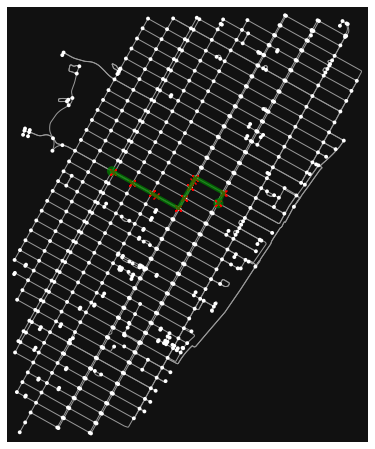

In [36]:
fig, ax = ox.plot_graph_route(G, route, route_color="green", route_alpha=0.75, show=False, close=False)
ax.scatter(route_crashes["LONGITUDE"], route_crashes["LATITUDE"], marker="x", c="red")
plt.show()